In [1]:
from pamona import Pamona
import numpy as np
import pamona

In [3]:
data1 = np.loadtxt("./PBMC/ATAC_scaledata.txt")
data2 = np.loadtxt("./PBMC/RNA_scaledata.txt")
type1 = np.loadtxt("./PBMC/ATAC_type.txt")
type2 = np.loadtxt("./PBMC/RNA_type.txt")
data1=pamona.utils.zscore_standardize(np.asarray(data1))
data2=pamona.utils.zscore_standardize(np.asarray(data2))
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
data = [data1,data2]
datatype = [type1,type2]

In [4]:
## incorporate prior information
M = []
n_datasets = len(data)
for k in range(n_datasets-1):
    M.append(np.ones((len(data[k]), len(data[-1]))))
    for i in range(len(data[k])):
        for j in range(len(data[-1])):
            if datatype[k][i] == datatype[-1][j]:
                M[k][i][j] = 0.5

In [6]:
Pa = Pamona.Pamona(n_shared=[1649], M=M, n_neighbors=30)
integrated_data, T = Pa.run_Pamona(data)

Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|9.370655e-04|
   10|3.275255e-08|
   20|1.096338e-11|
Pamona Done! takes 44.092073 seconds


In [7]:
index1 = np.argwhere(type1==0).reshape(1,-1).flatten()    
index2 = np.argwhere(type1==1).reshape(1,-1).flatten()
index3 = np.argwhere(type1==2).reshape(1,-1).flatten()
index4 = np.argwhere(type1==3).reshape(1,-1).flatten()
shared1 = np.hstack((index1, index2))
shared1 = np.hstack((shared1, index3))
shared1 = np.hstack((shared1, index4))
print(np.shape(shared1))

index1 = np.argwhere(type1==4).reshape(1,-1).flatten()    
index2 = np.argwhere(type1==5).reshape(1,-1).flatten()
specific1 = np.hstack((index1, index2))
print(np.shape(specific1))

index1 = np.argwhere(type2==0).reshape(1,-1).flatten()    
index2 = np.argwhere(type2==1).reshape(1,-1).flatten()
index3 = np.argwhere(type2==2).reshape(1,-1).flatten()
index4 = np.argwhere(type2==3).reshape(1,-1).flatten()
shared2 = np.hstack((index1, index2))
shared2 = np.hstack((shared2, index3))
shared2 = np.hstack((shared2, index4))
print(np.shape(shared2))

index1 = np.argwhere(type2==6).reshape(1,-1).flatten()    
index2 = np.argwhere(type2==7).reshape(1,-1).flatten()
index3 = np.argwhere(type2==8).reshape(1,-1).flatten()
index4 = np.argwhere(type2==9).reshape(1,-1).flatten()
specific2 = np.hstack((index1, index2))
specific2 = np.hstack((specific2, index3))
specific2 = np.hstack((specific2, index4))
print(np.shape(specific2))

(1465,)
(454,)
(1502,)
(483,)


In [8]:
Pa.alignment_score(integrated_data[0][shared1], integrated_data[-1][shared2], \
    data1_specific=integrated_data[0][specific1] , data2_specific=integrated_data[-1][specific2])
Pa.test_LabelTA(integrated_data[0][shared1],integrated_data[-1],type1[shared1],type2)

alignment score:
0.5764027959394045
label transfer accuracy:
0.9897610921501706


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


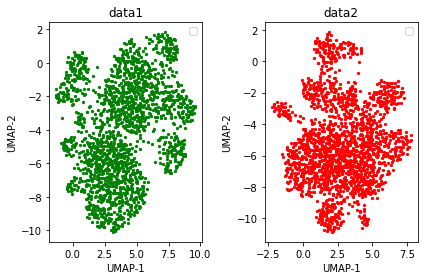

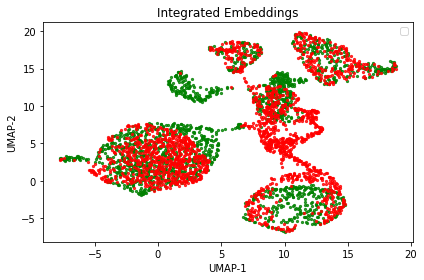

No handles with labels found to put in legend.
No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


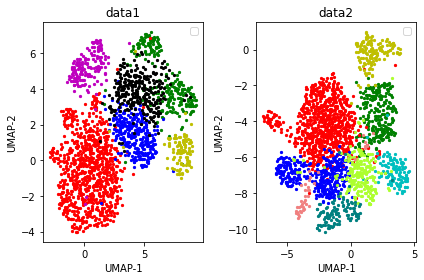

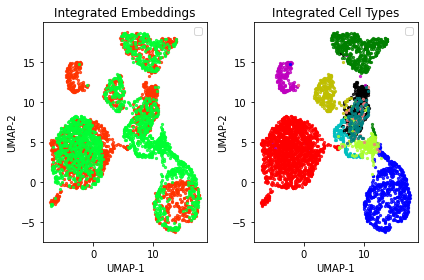

In [9]:
Pa.Visualize([data1,data2], integrated_data, mode='UMAP')  # without datatype
Pa.Visualize([data1,data2], integrated_data, [type1,type2], mode='UMAP') # with datatype